In [1]:
import keras

Using TensorFlow backend.


In [2]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
#標準的數據分析動作

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#由keras讀入MNIST

from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 8s 1us/step


In [5]:
#看測試資料是否為6萬筆
len(x_train)
len(y_train)

60000

In [6]:
#看300的訓練資料
x_train[300].shape

(28, 28)

In [7]:
#看300的訓練資料
x_train[300]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 138, 238, 217,  68,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

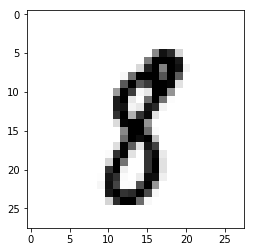

In [8]:
#顯示300的圖檔
plt.imshow(x_train[300],cmap='Greys')

In [9]:
#人眼辨識為8，看答案是不是相同
y_train[300]

8

In [10]:
#原本的數據為28*28的矩陣，但標準網路只吃平的、也就是每次要28*28=784長的向量，
#因此用reshape調校一下。
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [11]:
#one-hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
#看看是8的300號數據的答案
y_train[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [13]:
#決定神經網路架構和讀入相關套件
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [15]:
#建構神經網路，先打開一個空的再用add去加層
model = Sequential()
#第一層
model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))
#第二層
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [16]:
#用SOFTMAX當激發函數
model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
#組裝
model.compile(loss='mse',optimizer=SGD(lr=0.1),metrics=['accuracy'])

In [19]:
#以文字方式看模型的結構
model.summary()
#Param=輸入數量*所連接到的神經元+偏差(bias，有幾個神經元即有幾個偏差)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [22]:
#訓練神經網路，訓練幾筆資料(batch_size)，和共訓練幾次(epochs)
model.fit(x_train, y_train, batch_size=100, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.0820 - acc: 0.3434
Epoch 2/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0628 - acc: 0.6073
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0461 - acc: 0.7518
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0341 - acc: 0.8307
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0265 - acc: 0.8716
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0219 - acc: 0.8871
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0191 - acc: 0.8964
Epoch 8/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0172 - acc: 0.9038
Epoch 9/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0158 - acc: 0.9089
Epoch 10/20
60000/60000 [=================

In [23]:
#試用結果
from ipywidgets import interact_manual
#用predict_classes會讓keras選出10個輸入機率最大的那類
predict = model.predict_classes(x_test)
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap="Greys")
    print("神經網路盼隊為:",predict[測試編號])

In [24]:
interact_manual(test,測試編號=(0,9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [25]:
#將神經網路存起來
model_json=model.to_json()
open('handwriting_model_architecture.json','w').write(model_json)
model.save_weights('handwriting_model_weights.h5')